## OC Parcours Datascience
## Projet 3: Concevoir une application au service de la santé publique
  
### Etudiant: Vincent GAGNOT

### Première partie: retraitement des données.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api as smf
import statsmodels.api as sm

Import de la database (échantillon ou database totale).

In [2]:
data = pd.read_csv("en.openfoodfacts.org.products.csv", delimiter='\t', 
                   dtype={'code' : str, 
                          'first_packaging_code_geo' : str, 
                          'packaging_text' : str, 
                          'emb_codes' : str, 
                          'emb_codes_tags' : str, 
                          'cities_tags' : str,
                          'origins' : str,
                          'origins_tags' : str,
                          'manufacturing_places' : str,
                          'manufacturing_places_tags' : str,
                          'ingredients_from_palm_oil_tags' : str,
                          'brand_owner' : str}, 
                   nrows = 100000)

Suppression des doublons et petit nettoyage dans le nom des colonnes.

In [3]:
data = data.drop_duplicates()
data.columns = data.columns.str.replace('-', '_')
data.reset_index(drop=True)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0041387662245,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489052167,2017-03-09T09:36:07Z,1587571895,2020-04-22T16:11:35Z,"4c, plain bread crumbs",NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,0041387723571,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489140635,2017-03-10T10:10:35Z,1489140635,2017-03-10T10:10:35Z,Antioxidant Drink Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,0041387771268,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489140600,2017-03-10T10:10:00Z,1587633239,2020-04-23T09:13:59Z,"Romano grated cheese, romano",NaN,NaN,...,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,0041387904833,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489055431,2017-03-09T10:30:31Z,1587573186,2020-04-22T16:33:06Z,Naturally decaffeinated iced tea mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examens préliminaires de la base de données

La base de données est composée de 182 variables.  
Chaque ligne correspond à un produit, chaque colonne (182 donc) à un paramètre de ce produit.  
La BDD est accessible au grand public, à la fois pour consultation et remplissage. En conséquence, son nombre de lignes est en constante évolution, et la qualité des données (remplissage, notamment), est assez faible.     
  
Quels paramètres a-t-on pour chaque produit?

In [4]:
for i in range(len(data.columns)):
    print(data.columns[i])

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
main_category
main_category_en
image_url
image_small_url
image_ingredien

Premier test de remplissage - il y a beaucoup de colonnes vides ou peu remplies.

In [5]:
print("Total: " + str(len(data)) + " lignes")
for i in range(len(data.columns)):
    print(data.columns[i] + ": " + str(data.isna().sum(axis=0)[i]) + " vides.")

Total: 100000 lignes
code: 0 vides.
url: 0 vides.
creator: 0 vides.
created_t: 0 vides.
created_datetime: 0 vides.
last_modified_t: 0 vides.
last_modified_datetime: 0 vides.
product_name: 1787 vides.
generic_name: 98648 vides.
quantity: 95133 vides.
packaging: 97774 vides.
packaging_tags: 97774 vides.
packaging_text: 99992 vides.
brands: 45543 vides.
brands_tags: 45543 vides.
categories: 17465 vides.
categories_tags: 17465 vides.
categories_en: 17465 vides.
origins: 99464 vides.
origins_tags: 99466 vides.
manufacturing_places: 99101 vides.
manufacturing_places_tags: 99101 vides.
labels: 94086 vides.
labels_tags: 94086 vides.
labels_en: 94086 vides.
emb_codes: 99772 vides.
emb_codes_tags: 99772 vides.
first_packaging_code_geo: 99950 vides.
cities: 100000 vides.
cities_tags: 99949 vides.
purchase_places: 98402 vides.
stores: 95021 vides.
countries: 155 vides.
countries_tags: 155 vides.
countries_en: 155 vides.
ingredients_text: 11227 vides.
allergens: 79051 vides.
allergens_en: 100000 vi

### Nettoyage de la base de données:

#### Remplissage:

Après avoir travaillé sur les données, je constate que quelques colonnes très peu remplies peuvent poser des problèmes dans l'analyse (corrélations qui n'ont aucun sens par exemple).  
Je décide de supprimer les colonnes remplies à moins de 20%.  

In [6]:
data1 = data.copy()
print('Taille de départ: ' + str(data1.shape))
print(' ')
l = len(data1)
print('Colonnes peu remplies et supprimées:')
for i in reversed(range(len(data1.columns))):
    if data1.isna().sum(axis=0)[i] > (l * 0.8):
        print(data1.columns[i])
        data1 = data1.drop(columns = data1.columns[i], axis = 1)
print(' ')
print('Taille de fin'+ str(data1.shape))

Taille de départ: (100000, 182)
 
Colonnes peu remplies et supprimées:
carnitine_100g
inositol_100g
beta_glucan_100g
phylloquinone_100g
choline_100g
water_hardness_100g
glycemic_index_100g
nutrition_score_uk_100g
carbon_footprint_from_meat_or_fish_100g
carbon_footprint_100g
chlorophyl_100g
cocoa_100g
collagen_meat_protein_ratio_100g
fruits_vegetables_nuts_estimate_100g
fruits_vegetables_nuts_dried_100g
fruits_vegetables_nuts_100g
ph_100g
taurine_100g
caffeine_100g
iodine_100g
molybdenum_100g
chromium_100g
selenium_100g
fluoride_100g
manganese_100g
copper_100g
zinc_100g
magnesium_100g
phosphorus_100g
chloride_100g
bicarbonate_100g
silica_100g
pantothenic_acid_100g
biotin_100g
vitamin_b12_100g
folates_100g
vitamin_b9_100g
vitamin_b6_100g
vitamin_pp_100g
vitamin_b2_100g
vitamin_b1_100g
vitamin_k_100g
vitamin_e_100g
vitamin_d_100g
beta_carotene_100g
alcohol_100g
nucleotides_100g
serum_proteins_100g
casein_100g
_insoluble_fiber_100g
_soluble_fiber_100g
polyols_100g
starch_100g
_maltodextrin

In [7]:
print("Après modifications, sur un total de " + str(len(data1)) + " lignes, sont vides, pour chaque colonne:")
for i in range(len(data1.columns)):
    print(data1.columns[i] + ": " + str(data1.isna().sum(axis=0)[i]) + " vides.")

Après modifications, sur un total de 100000 lignes, sont vides, pour chaque colonne:
code: 0 vides.
url: 0 vides.
creator: 0 vides.
created_t: 0 vides.
created_datetime: 0 vides.
last_modified_t: 0 vides.
last_modified_datetime: 0 vides.
product_name: 1787 vides.
brands: 45543 vides.
brands_tags: 45543 vides.
categories: 17465 vides.
categories_tags: 17465 vides.
categories_en: 17465 vides.
countries: 155 vides.
countries_tags: 155 vides.
countries_en: 155 vides.
ingredients_text: 11227 vides.
allergens: 79051 vides.
serving_size: 12882 vides.
serving_quantity: 12879 vides.
additives_n: 11227 vides.
additives_tags: 40476 vides.
additives_en: 40476 vides.
ingredients_from_palm_oil_n: 11227 vides.
ingredients_that_may_be_from_palm_oil_n: 11227 vides.
nutriscore_score: 32087 vides.
nutriscore_grade: 32087 vides.
nova_group: 16918 vides.
pnns_groups_1: 121 vides.
pnns_groups_2: 7 vides.
states: 0 vides.
states_tags: 0 vides.
states_en: 0 vides.
brand_owner: 20241 vides.
main_category: 1746

In [8]:
Données_numériques = []
Données_non_numériques = []
for i in data1.columns.tolist():
    if all(isinstance(e, (int, float)) for e in data1[i].unique()):
        Données_numériques.append(i)
               
    else:
        Données_non_numériques.append(i)

Les données restantes, par type, sont:

In [9]:
print('Données numériques:')
print(Données_numériques)
print(' ')
print('Données non numériques:')
print(Données_non_numériques)

Données numériques:
['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 'nutrition_score_fr_100g']
 
Données non numériques:
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'serving_size', 'additives_tags', 'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'brand_owner', 'main_category', 'main_category_en']


#### Valeurs aberrantes: limite des 100g

Beaucoup de données sont en "pour 100g".  
Ce "pour 100g" indique le poids du composant pour 100g de produit. Une ligne dont un des composants, ou dont la somme des composants dépassera 100g sera incorrectement remplie et donc à exclure.  
Attention, certaines variables reprennent plusieurs fois les mêmes composants (par exemple, Fat et Saturated_fat). D'apès mes recherches, les variables sommables pour cette vérification sont:  'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'.
  
J'exclue les entrées qui dépassent les 100g dans une seule variables puis en somme .

In [10]:
def check_100g (row):
    check = False
    for i in Données_numériques:
        if i.endswith('100g') and not(i.startswith('energy') or i.startswith('carbon') or i.startswith('nutrition')):
            if row[i] > 100:
                check = True
    return check

In [11]:
data1['check_100g'] = data1.apply(lambda x: check_100g(x), axis = 1)

In [12]:
print("Exclu pour var > 100g: " + str(len(data1[data1['check_100g'] == True])) + " sur " + str(len(data1)))

Exclu pour var > 100g: 92 sur 100000


In [13]:
def check_100g_somme (row):
    check = False
    if ( (row['fat_100g'] + row['carbohydrates_100g'] + row['fiber_100g'] + row['proteins_100g'] + row['salt_100g']) > 100):
        check = True
    return check

In [14]:
data1['check_100g_somme'] = data1.apply(lambda x: check_100g_somme(x), axis = 1)

In [15]:
print("Exclu pour somme> 100g: " + str(len(data1[data1['check_100g_somme'] == True])) + " sur " + str(len(data1)))

Exclu pour somme> 100g: 10247 sur 100000


In [16]:
data1.drop(data1[data1['check_100g']==True].index, inplace=True)
data1.drop(data1[data1['check_100g_somme']==True].index, inplace=True)
data1 = data1.drop(columns = ['check_100g'])
data1 = data1.drop(columns = ['check_100g_somme'])

J'ajoute la variable 'isdrink'.  
Elle sera utile dans la mesure où le nutriscore est calculé différemment selon que le produit soit une boisson ou non.

In [17]:
def isdrink (row):
    output = False
    import math
    if row['pnns_groups_1'] == 'Beverages':
        output = True 
    return output

data1['isdrink'] = data1.apply(lambda x: isdrink(x), axis = 1)

if ('isdrink' in Données_non_numériques) == False:
    Données_non_numériques.append('isdrink')

#### Valeurs aberrantes: outliers

J'ai déjà décelé des valeurs étranges parmi les valeurs numériques. Je dois procéder à un nettoyage des valeurs aberrantes - je vais supprimer les lignes qui en contiennent.    
J'examine les différentes variables numériques en format boxplot, pour rechercher ces valeurs aberrantes.

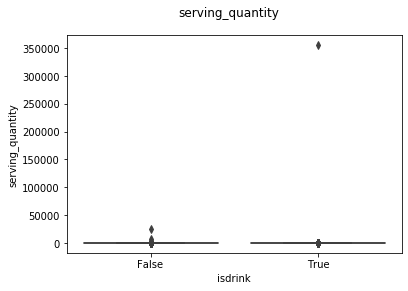

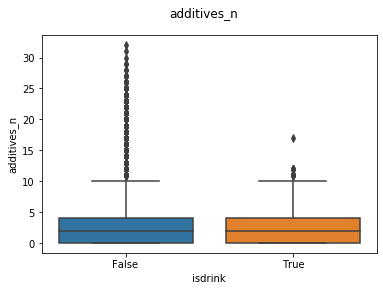

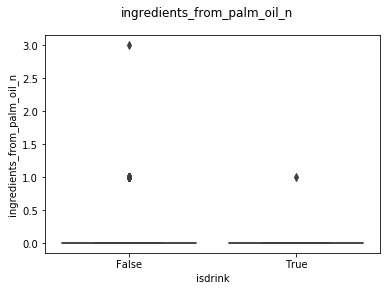

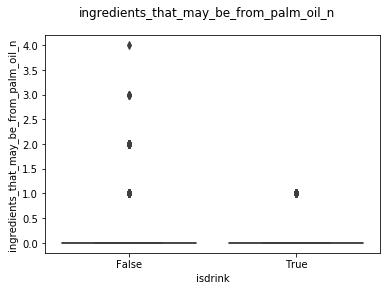

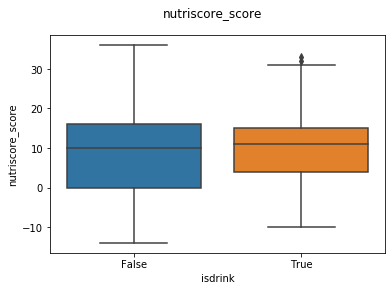

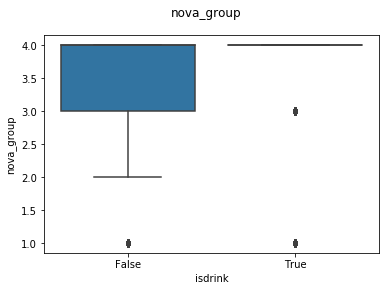

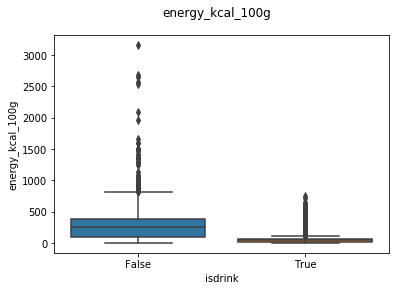

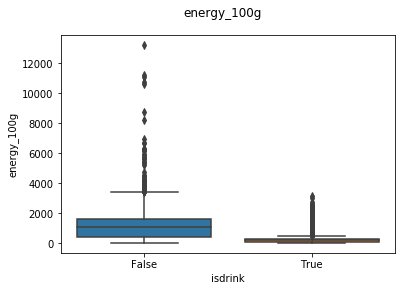

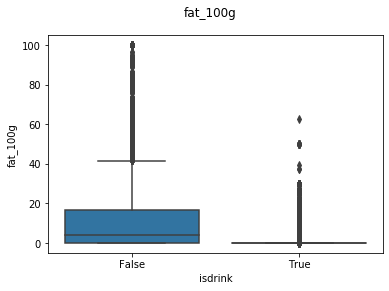

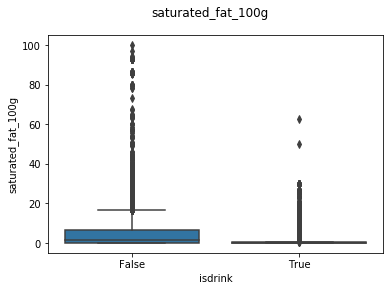

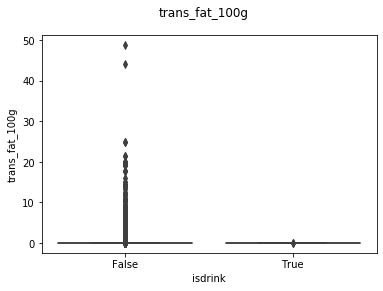

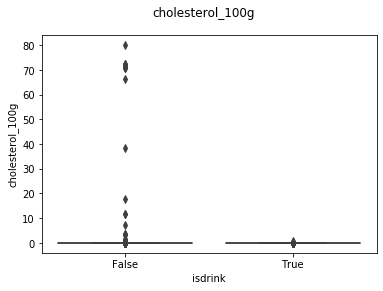

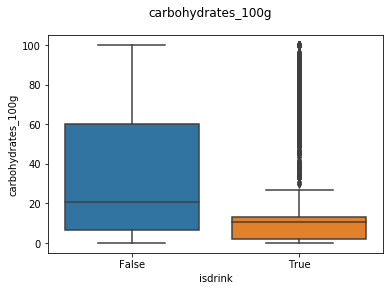

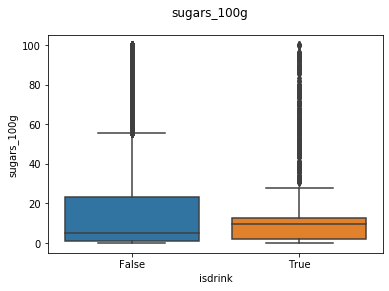

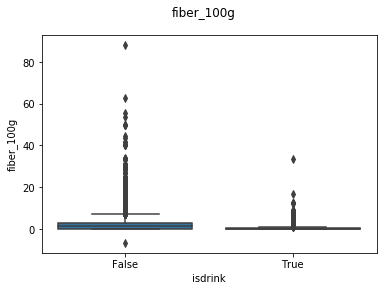

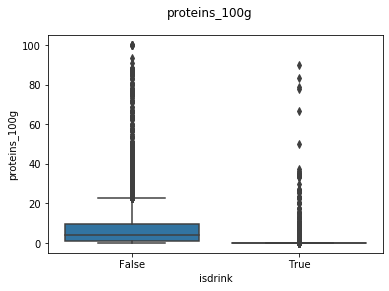

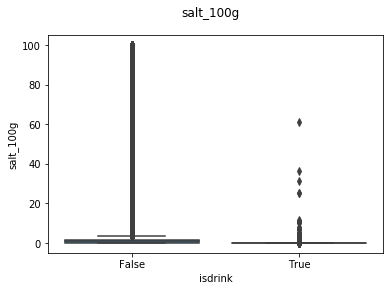

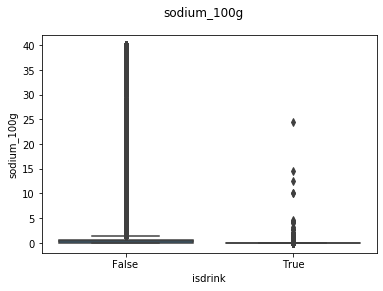

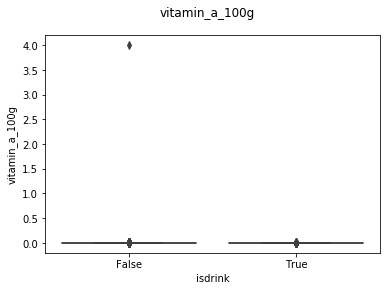

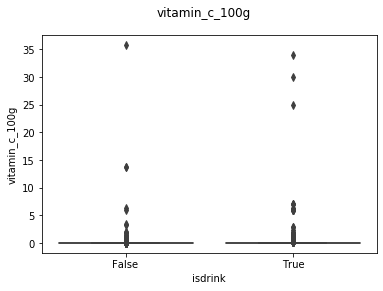

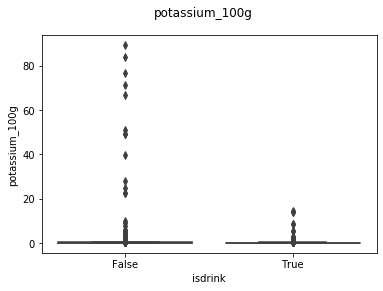

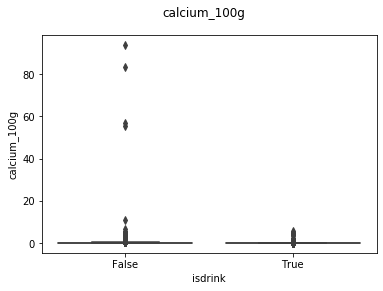

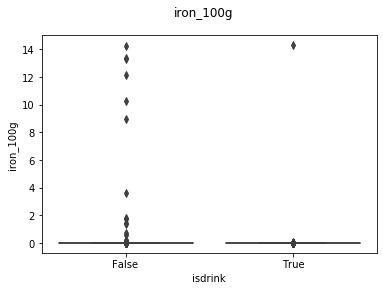

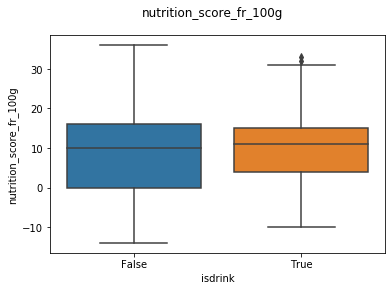

In [18]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1, x = 'isdrink')
    plt.suptitle(c)
    plt.show()

La variable pnns_groups_2 étant très utile pour la suite de l'analyse, je choisis d'éliminer tous les individus pour lesquels cette variable n'est pas remplie (est 'unknown').

In [19]:
data1.drop(data1[data1['pnns_groups_2'] == 'unknown'].index, inplace=True)

Je vais faire un filtre sur certaines valeurs numériques en 2 étapes: 
 - De façon empirique, en examinant boxplot, individus particuliers, et en m'aidant de données techniques disponibles sur internet,
 - En utilisant les données interquartiles.  
Ce filtre s'appuyera sur le critère pnns_groups_2 et différenciera les boissons et le reste des individus.

Pour examiner chaque variable une par une, j'utilise un format du genre:

In [20]:
variable = 'fat_100g'
limite = 40
print(data1[['product_name', 'pnns_groups_2', variable]].loc[(data1['isdrink'] == False) & (data1[variable] >= limite)])
print(data1['pnns_groups_2'].loc[(data1['isdrink'] == False) & (data1[variable] >= limite)].unique())
print(data1[variable].loc[(data1['isdrink'] == False)].describe())

                                            product_name  \
380                         Organisé pesto alla genovese   
383                              Pesto à la roquette bio   
520              Foie gras de canard entier du sud-ouest   
710                           Huile d'olive vierge extra   
736    Véritable pâte à tartiner noisettes chocolat noir   
...                                                  ...   
99799                                          Margarine   
99868                                             Butter   
99932  Homestyle 100% imported italian pecorino roman...   
99989           Natural parmesan grated cheese, parmesan   
99997                       Romano grated cheese, romano   

                  pnns_groups_2   fat_100g  
380        Dressings and sauces  64.500000  
383        Dressings and sauces  53.200001  
520    Salty and fatty products  48.200000  
710                        Fats  92.000000  
736                      Sweets  48.000000  
...      

L'équivalent pour les boissons est celui-ci:

In [21]:
variable = 'fat_100g'
limite = 5
print(data1[['product_name', 'pnns_groups_2', variable]].loc[(data1['isdrink'] == True) & (data1[variable] >= limite)])
print(data1['pnns_groups_2'].loc[(data1['isdrink'] == True) & (data1[variable] >= limite)].unique())
print(data1[variable].loc[(data1['isdrink'] == True) & (data1['pnns_groups_2'] == 'Artificially sweetened beverages')].describe())

                                      product_name  \
1268                      Low fat milk alternative   
1269                       Chocolate morning moo's   
3823                                  Lait de coco   
3826                                  Lait de coco   
4208                     Christmas Cocoa Chocolate   
...                                            ...   
99331            Original non-dairy coffee creamer   
99332            Original non-dairy coffee creamer   
99333                      Original coffee creamer   
99383  Original non-dairy coffee creamer, original   
99384            Original coffee creamer, original   

                      pnns_groups_2  fat_100g  
1268   Plant-based milk substitutes     14.71  
1269   Plant-based milk substitutes     10.00  
3823   Plant-based milk substitutes     28.00  
3826   Plant-based milk substitutes     17.40  
4208            Sweetened beverages      5.71  
...                             ...       ...  
99331  Plant-ba

Après examen et recherches, j'ai établi une liste de filtres empiriques.  
Si les variables nommées dans la 1ère colonne, pour le groupe de produits de la 2e colonne, dépassent la valeur indique dans la 3e colonne, alors je soupçonne fortement un problème dans le remplissage de l'individu:

In [22]:
array_filtre_outliers_nodrink = [
    ['energy_kcal_100g', 'Biscuits and cakes', 550],
    ['energy_kcal_100g', 'Sweets', 550],
    ['energy_kcal_100g', 'Chocolate products', 550],
    ['energy_kcal_100g', 'pastries', 550],
    ['energy_kcal_100g', 'Dressings and sauces', 100],
    ['energy_kcal_100g', 'Fats', 100],
    ['energy_kcal_100g', 'autres', 550],
    ['energy_100g', 'autres', 3700],
    ['fat_100g', 'Fats', 100],
    ['fat_100g', 'Cheese', 60],
    ['fat_100g', 'Dressings and sauces', 40],
    ['fat_100g', 'Salty and fatty products', 40],
    ['fat_100g', 'Milk and yogurt', 40],
    ['fat_100g', 'One-dish meals', 30],
    ['fat_100g', 'Biscuits and cakes', 30],
    ['fat_100g', 'Milk and yogurt', 30],
    ['fat_100g', 'autres', 25],
    ['saturated_fat_100g', 'Fats', 100],
    ['saturated_fat_100g', 'Cheese', 40],
    ['saturated_fat_100g', 'Dressings and sauces', 20],
    ['saturated_fat_100g', 'Salty and fatty products', 20],
    ['saturated_fat_100g', 'Milk and yogurt', 20],
    ['saturated_fat_100g', 'One-dish meals', 15],
    ['saturated_fat_100g', 'Biscuits and cakes', 15],
    ['saturated_fat_100g', 'Milk and yogurt', 15],
    ['saturated_fat_100g', 'autres', 12],
    ['trans_fat_100g', 'Fats', 100],
    ['trans_fat_100g', 'Cheese', 6],
    ['trans_fat_100g', 'Dressings and sauces', 4],
    ['trans_fat_100g', 'Salty and fatty products', 4],
    ['trans_fat_100g', 'Milk and yogurt', 4],
    ['trans_fat_100g', 'One-dish meals', 3],
    ['trans_fat_100g', 'Biscuits and cakes', 3],
    ['trans_fat_100g', 'Milk and yogurt', 3],
    ['trans_fat_100g', 'autres', 2],
    ['cholesterol_100g', 'autres', 1],
    ['carbohydrates_100g', 'Sweets', 100],
    ['carbohydrates_100g', 'Cereals', 95],
    ['carbohydrates_100g', 'Breakfast cereals', 95],
    ['carbohydrates_100g', 'Biscuits and cakes', 95],
    ['carbohydrates_100g', 'Chocolate products', 95],
    ['carbohydrates_100g', 'Alcoholic beverages', 95],
    ['carbohydrates_100g', 'Fruits', 30],
    ['carbohydrates_100g', 'autres', 80],
    ['sugars_100g', 'Sweets', 100],
    ['sugars_100g', 'Cereals', 90],
    ['sugars_100g', 'Breakfast cereals', 90],
    ['sugars_100g', 'Biscuits and cakes', 90],
    ['sugars_100g', 'Chocolate products', 90],
    ['sugars_100g', 'Alcoholic beverages', 90],
    ['sugars_100g', 'Fruits', 30],
    ['sugars_100g', 'autres', 60],
    ]



array_filtre_outliers_drink = [
    ['energy_kcal_100g', 'Sweetened beverages', 200],
    ['energy_kcal_100g', 'Artificially sweetened beverages', 200],
    ['energy_kcal_100g', 'autres', 150],
    ['energy_100g', 'autres', 3700],
    ['fat_100g', 'Plant-based milk substitutes', 15],
    ['fat_100g', 'autres', 8],
    ['fat_100g', 'Plant-based milk substitutes', 10],
    ['fat_100g', 'autres', 8],
    ['cholesterol_100g', 'autres', 1],
    ['carbohydrates_100g', 'autres', 80],
    ['sugars_100g', 'Sweetened beverages', 100],
    ['sugars_100g', 'Artificially sweetened beverages', 90],
    ['sugars_100g', 'autres', 60],
    ]

df_filtre_outliers_nodrink = pd.DataFrame(array_filtre_outliers_nodrink, columns=['variable', 'pnns_groups_2', 'limite'])
df_filtre_outliers_drink = pd.DataFrame(array_filtre_outliers_drink, columns=['variable', 'pnns_groups_2', 'limite'])

Sur la base de ces valeurs, je marque les outliers "empiriques".

In [23]:
def check_outliers_empirique (row):
    output = False
    if row['isdrink'] == True:
        for i in list(df_filtre_outliers_drink['variable'].unique()):
            if not(np.isnan(row[i])):
                if row['pnns_groups_2'] in list(df_filtre_outliers_drink['pnns_groups_2'].loc[df_filtre_outliers_drink['variable'] == i].unique()):
                    if row[i] >= df_filtre_outliers_drink['limite'].loc[(df_filtre_outliers_drink['variable'] == i) & (df_filtre_outliers_drink['pnns_groups_2'] == row['pnns_groups_2'])].iloc[0]:
                        output = True
                else:
                    if row[i] >= df_filtre_outliers_drink['limite'].loc[(df_filtre_outliers_drink['variable'] == i) & (df_filtre_outliers_drink['pnns_groups_2'] == 'autres')].iloc[0]:
                        output = True
    if row['isdrink'] == False:
        for i in list(df_filtre_outliers_nodrink['variable'].unique()):
            if not(np.isnan(row[i])):
                if row['pnns_groups_2'] in list(df_filtre_outliers_nodrink['pnns_groups_2'].loc[df_filtre_outliers_nodrink['variable'] == i].unique()):
                    if row[i] >= df_filtre_outliers_nodrink['limite'].loc[(df_filtre_outliers_nodrink['variable'] == i) & (df_filtre_outliers_nodrink['pnns_groups_2'] == row['pnns_groups_2'])].iloc[0]:
                        output = True
                else:
                    if row[i] >= df_filtre_outliers_nodrink['limite'].loc[(df_filtre_outliers_nodrink['variable'] == i) & (df_filtre_outliers_nodrink['pnns_groups_2'] == 'autres')].iloc[0]:
                        output = True
    return output

In [24]:
data1['check_empirique'] = data1.apply(lambda x: check_outliers_empirique(x), axis = 1)

J'exclue maintenant les outliers statistiques.  
Je choisis une limite calquée sur le comportement des boxplot Python: Q3 + 1.5xIQR (IQR = Q3-Q1).
Les variables concernées sont:
 - 'nutriscore_score'
 - 'energy_kcal_100g'
 - 'energy_100g'
 - 'fat_100g'
 - 'saturated_fat_100g'
 - 'trans_fat_100g'
 - 'cholesterol_100g'
 - 'carbohydrates_100g'
 - 'sugars_100g'
 - 'fiber_100g'
 - 'proteins_100g'
 - 'salt_100g'
 - 'sodium_100g'

In [25]:
lim_statistique = []
import math
for l in data1['pnns_groups_2'].unique():
    lim_l = [l]
    for k in ['nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
        if (math.isnan(data1[k][data1['pnns_groups_2'] == l].quantile(q = 0.75, interpolation='linear')) or math.isnan(data1[k][data1['pnns_groups_2'] == l].quantile(q = 0.75, interpolation='linear'))):
            lim_l = lim_l +[np.nan]
        else:
            lim_l = lim_l + [2.5*data1[k][data1['pnns_groups_2'] == l].quantile(q = 0.75, interpolation='linear') - 1.5*data1[k][data1['pnns_groups_2'] == l].quantile(q = 0.25, interpolation='linear')]
    lim_statistique.append(lim_l)
df_lim_statistique = pd.DataFrame(lim_statistique, columns=['pnns_groups_2', 'nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'])

In [26]:
data1['fat_100g'][data1['pnns_groups_2'] == 'Fats'].quantile(q = 0.25, interpolation='linear')

50.0

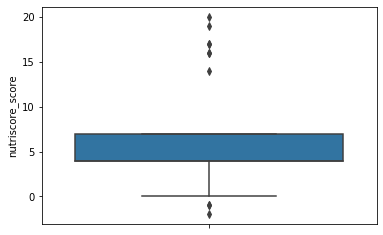

In [27]:
sns.boxplot(y = 'nutriscore_score',  data = data1[data1['pnns_groups_2'] == 'Dairy desserts'])

Le tableau des limites supérieures:

In [28]:
df_lim_statistique

,pnns_groups_2,nutriscore_score,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Dressings and sauces,36.500,586.250,2436.500,41.675000,8.32500,0.000000,0.008125,40.32500,36.99500,4.000000,4.175000,4.710625,1.884250
1,One-dish meals,26.000,618.375,2559.000,16.320000,5.95000,0.000000,0.037500,69.27500,8.84500,5.650000,19.680000,3.364375,1.345750
2,Biscuits and cakes,32.500,589.500,2474.500,36.975000,17.13000,0.000000,0.070000,97.77500,62.50375,7.250000,10.450000,1.806250,0.722500
3,Fruits,1.000,121.500,507.500,0.000000,0.00000,0.000000,0.000000,29.86500,25.39500,2.800000,1.975000,0.050000,0.020000
4,Meat,37.500,491.500,2053.500,41.695000,16.33000,0.000000,0.110500,17.65000,4.80000,1.750000,29.531250,4.034375,1.613750
5,Cheese,21.500,553.500,2314.500,48.205000,28.87500,0.000000,0.174500,12.52500,8.92500,0.000000,38.815000,2.800000,1.120000
6,Bread,7.500,336.000,1406.500,7.985000,0.90000,0.000000,0.000000,64.56000,14.14500,7.400000,15.000000,1.810000,0.724000
7,Fish and seafood,11.500,358.250,1483.500,24.555000,4.55000,0.000000,0.146250,26.55000,2.97500,0.500000,32.850000,2.575312,1.030125
8,Sweets,36.500,562.000,2352.500,21.181250,28.12500,0.000000,0.022500,128.70000,113.70000,5.000000,9.250000,0.500000,0.200000
9,Salty and fatty products,28.750,616.250,2533.000,54.105000,16.67500,0.000000,0.000000,16.67500,1.50000,12.750000,3.418750,7.322500,2.929000


In [29]:
def check_outliers_statistique (row):
    output = False
    for i in ['nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
        if not(np.isnan(row[i])) and not(np.isnan(df_lim_statistique[i][df_lim_statistique['pnns_groups_2'] == row['pnns_groups_2']].iloc[0])):
            if row[i] > df_lim_statistique[i][df_lim_statistique['pnns_groups_2'] == row['pnns_groups_2']].iloc[0]:
                output = True
    return output

In [30]:
data1['check_statistique'] = data1.apply(lambda x: check_outliers_statistique(x), axis = 1)

Les lignes sélectionnées comme étant à éliminer selon ces critères:

In [31]:
data1[data1['check_statistique'] == True][['pnns_groups_2', 'nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']]

,pnns_groups_2,nutriscore_score,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
3,Dressings and sauces,18.0,NaN,936.0,8.2,2.2,NaN,NaN,29.00,22.00,0.0,5.1,4.600,1.8400
31,Fruits,-2.0,157.0,657.0,0.0,0.0,NaN,NaN,36.00,27.00,3.6,0.6,0.000,0.0000
62,Bread,0.0,197.0,824.0,5.0,1.1,NaN,NaN,28.70,3.00,NaN,8.4,0.467,0.1868
67,Fish and seafood,15.0,253.0,1059.0,17.0,2.6,NaN,NaN,0.50,0.50,NaN,23.0,2.500,1.0000
69,One-dish meals,17.0,235.0,983.0,15.0,7.5,NaN,NaN,1.00,1.00,NaN,24.0,2.000,0.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,Sweetened beverages,NaN,389.0,1628.0,0.0,NaN,0.0,NaN,94.44,94.44,NaN,0.0,0.000,0.0000
99994,Sweetened beverages,NaN,389.0,1628.0,0.0,NaN,0.0,NaN,94.44,94.44,NaN,0.0,0.000,0.0000
99997,Cheese,21.0,500.0,2092.0,40.0,20.0,0.0,0.1,0.00,0.00,0.0,40.0,6.000,2.4000
99998,Sweetened beverages,NaN,389.0,1628.0,0.0,NaN,0.0,NaN,94.44,94.44,NaN,0.0,0.000,0.0000


J'élimine les outliers statistiques et empiriques.

In [32]:
data1.drop(data1[data1['check_statistique'] == True].index, inplace=True)
data1.drop(data1[data1['check_empirique'] == True].index, inplace=True)
data1 = data1.drop(columns = ['check_statistique'])
data1 = data1.drop(columns = ['check_empirique'])

### Analyse univariée

Une partie des colonnes correspondent à des données numériques. Pour ces données, je fais un histogramme montrant la répartition des données.  
Pour les autres, je peux aussi faire un histogramme si le nombre de valeurs différentes est limité.  
Je fais également un diagramme circulaire pour représenter les valeurs encore manquantes.  
  
J'en profite pour faire une liste de valeurs numériques et une autre de valeurs non numériques.

C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


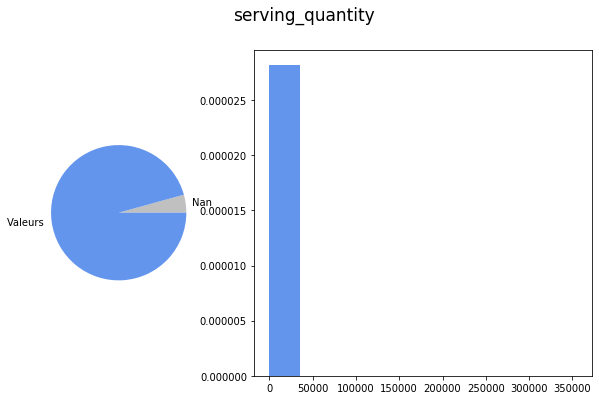

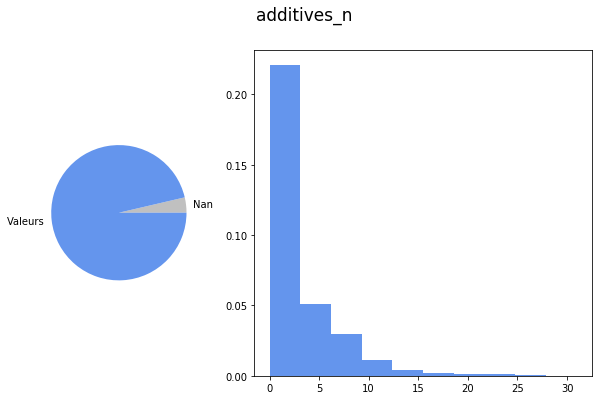

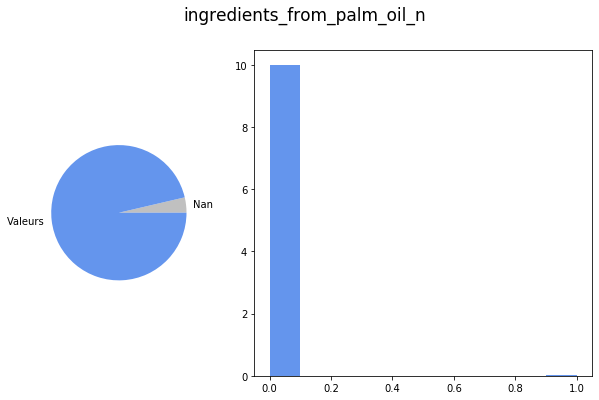

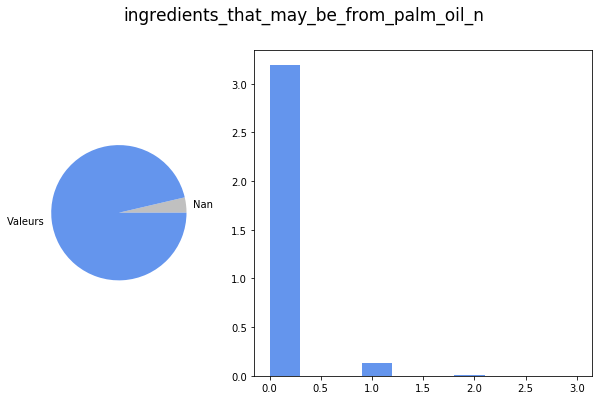

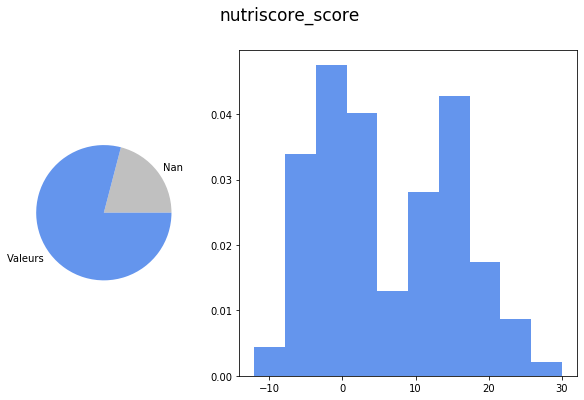

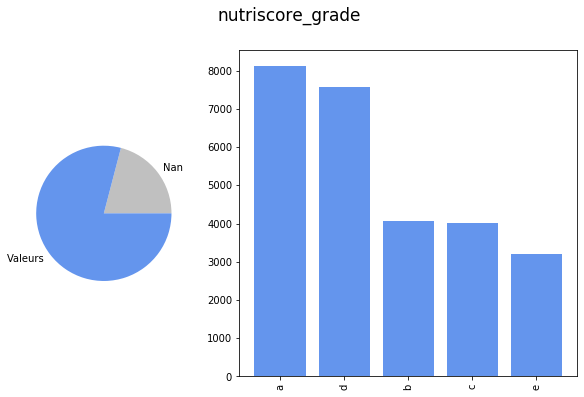

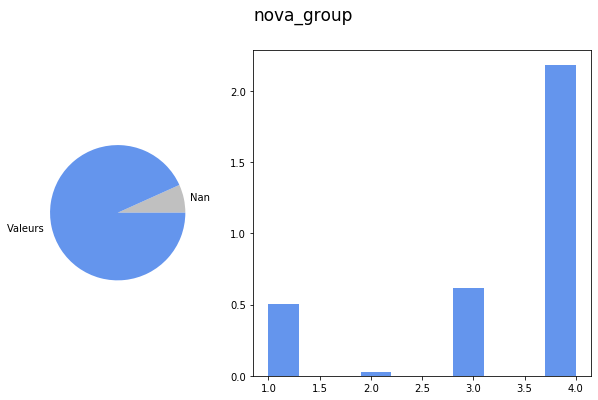

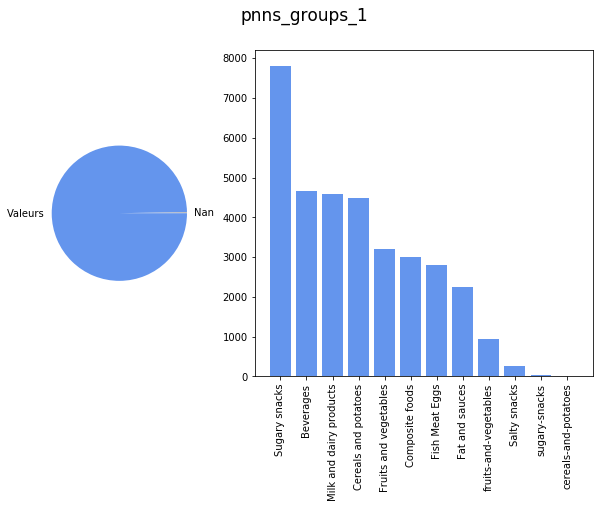

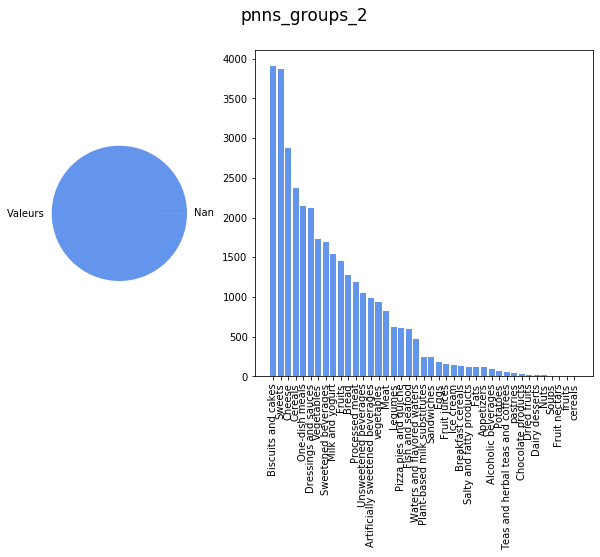

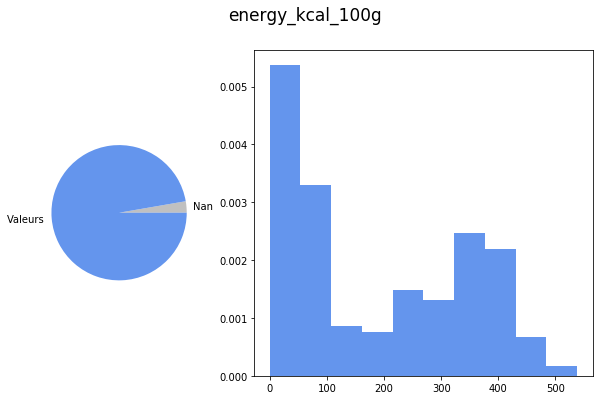

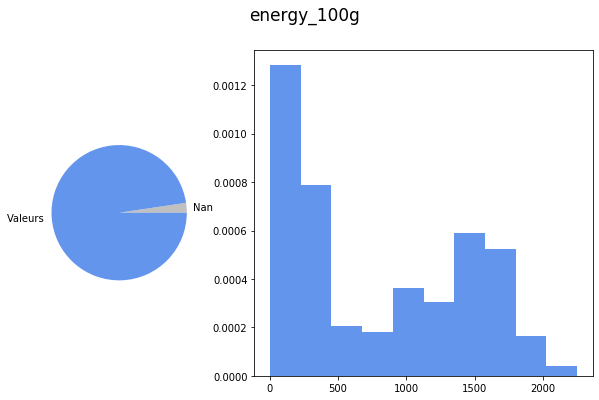

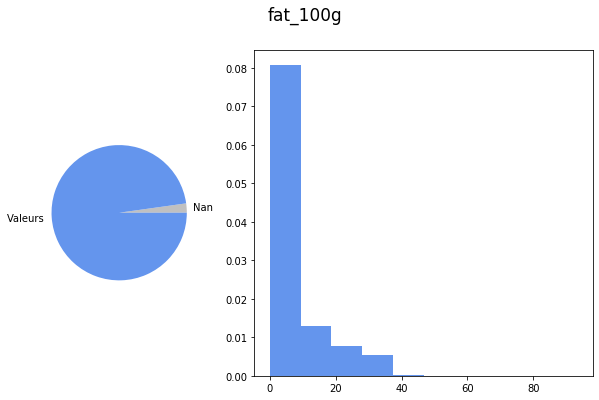

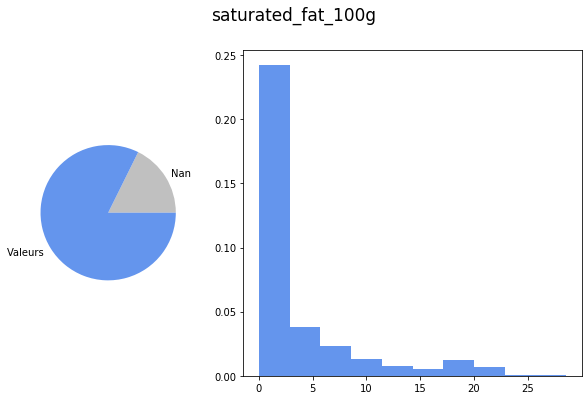

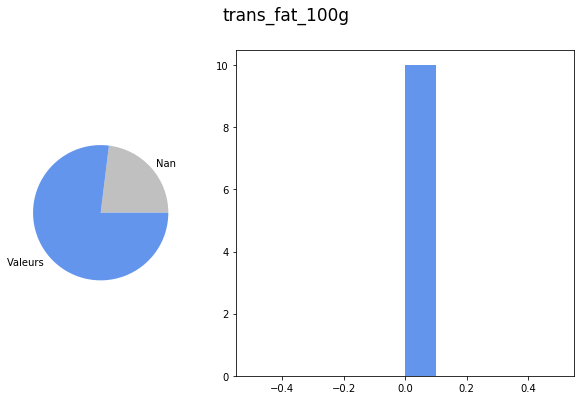

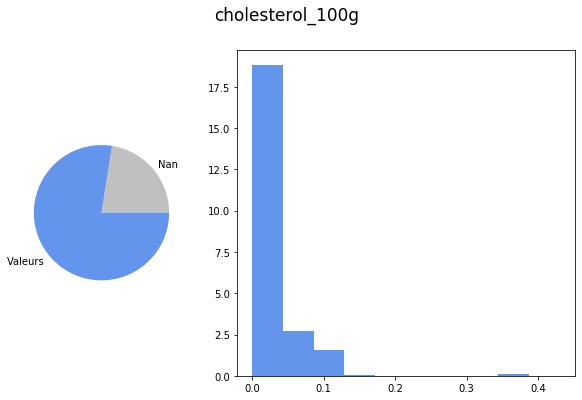

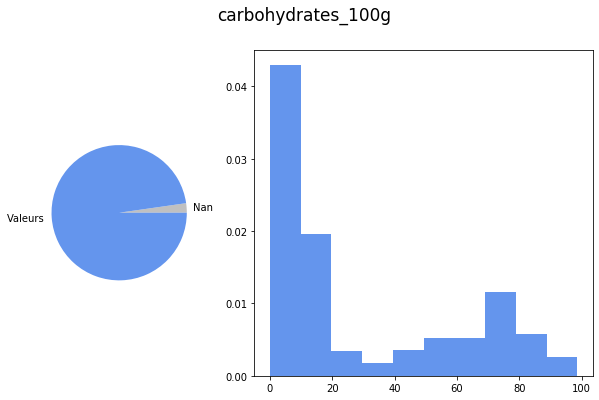

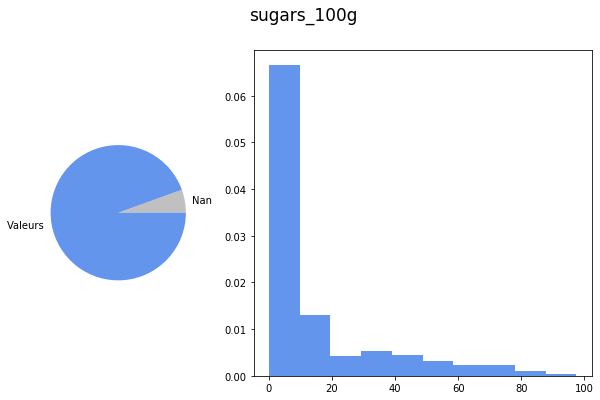

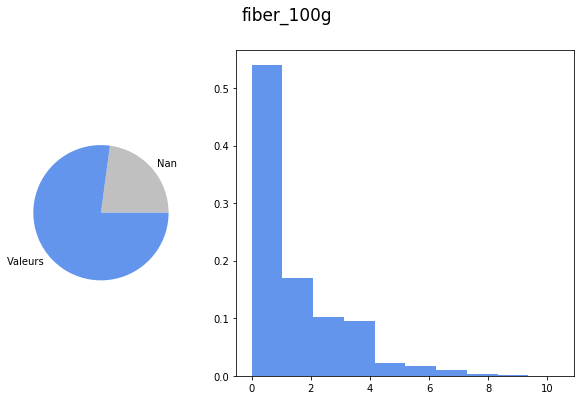

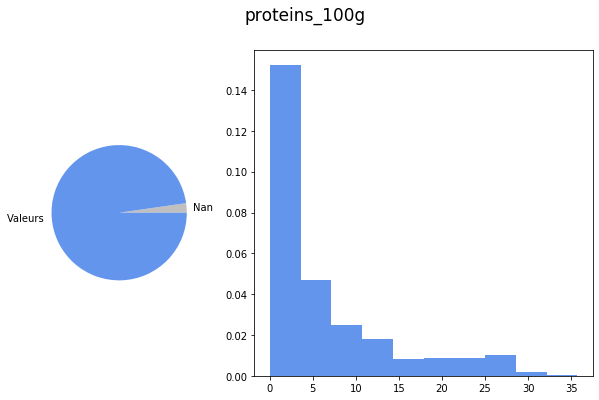

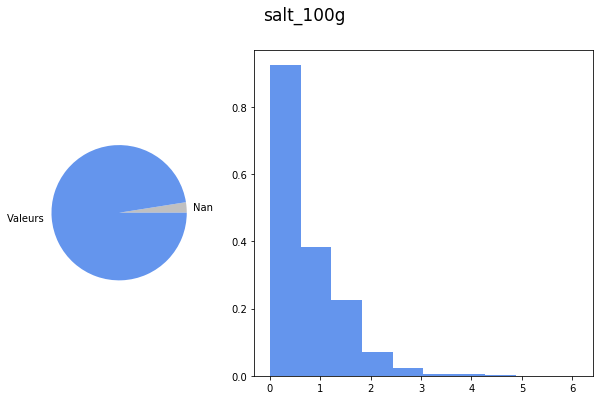

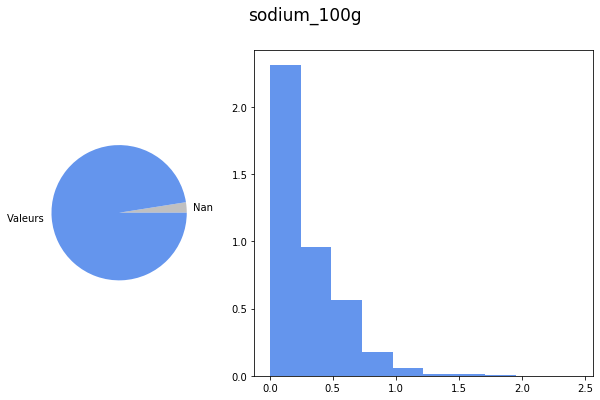

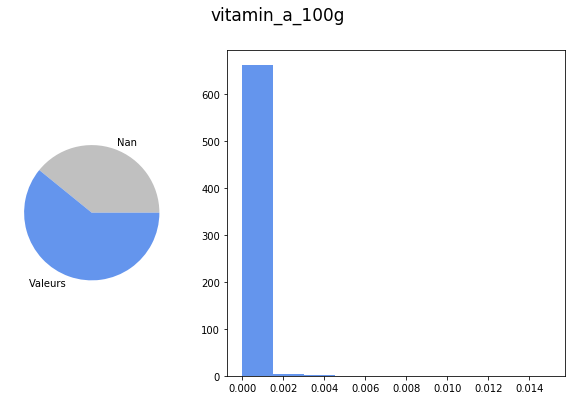

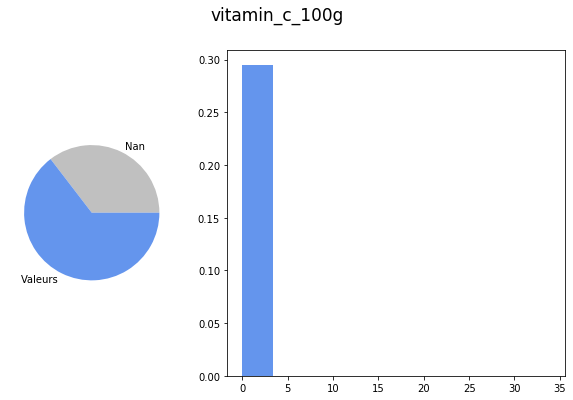

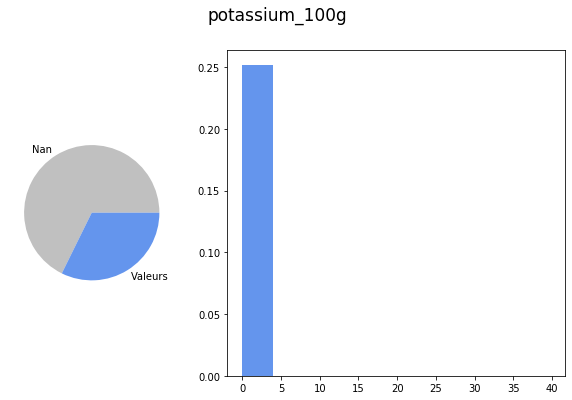

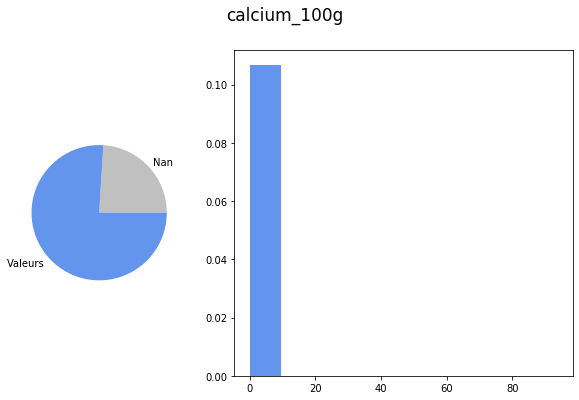

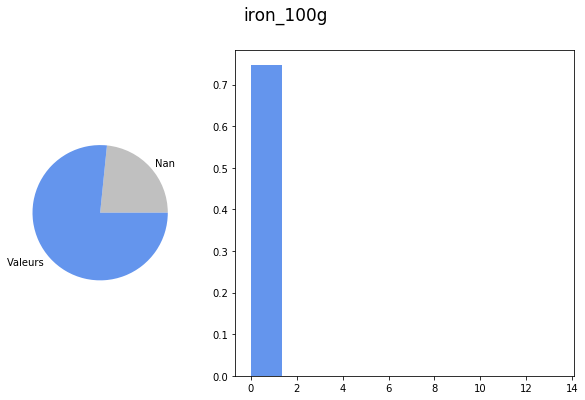

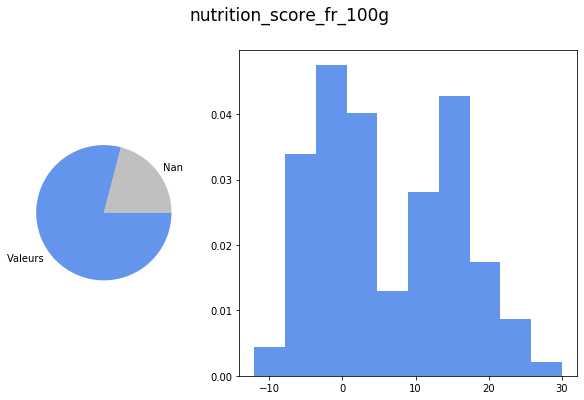

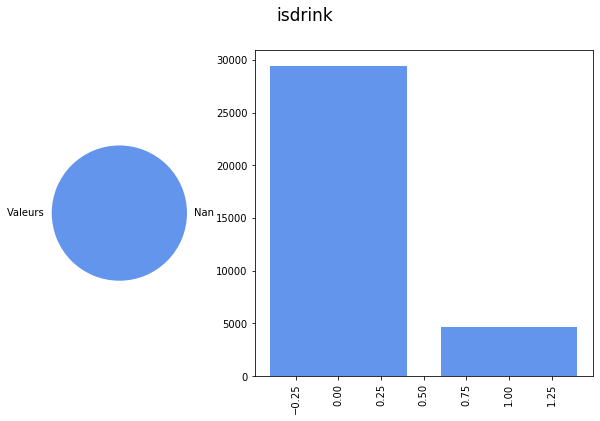

In [33]:
for i in data1.columns.tolist():
    if all(isinstance(e, (int, float)) for e in data1[i].unique()):
        val_na = data1[i].isna().sum()/len(data1[i])
        val_non_na = 1 - val_na
        fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
        fig.suptitle(i, fontsize=17)
        ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
        ax2.hist(data1[i], density=True, color=['cornflowerblue'])
        plt.show()        
    else:
        if len(data1[i].unique()) < 50:
            nombre_vals = data1[i].value_counts()
            val_na = data1[i].isna().sum()/len(data1[i])
            val_non_na = 1 - val_na
            fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
            fig.suptitle(i, fontsize=17)
            ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
            ax2.bar(nombre_vals.index, nombre_vals.values, color=['cornflowerblue'])
            plt.xticks(rotation=90)  
            plt.show()

Describe: examen de la répartition des individus pour les différentes variables numériques.

In [34]:
for c in Données_numériques:
    print(c)
    print(data1[c].describe())

serving_quantity
count     32661.000000
mean        121.444014
std        1966.281073
min           0.000000
25%          32.000000
50%          74.000000
75%         140.000000
max      355000.000000
Name: serving_quantity, dtype: float64
additives_n
count    32881.000000
mean         2.943554
std          3.896257
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max         31.000000
Name: additives_n, dtype: float64
ingredients_from_palm_oil_n
count    32881.000000
mean         0.001156
std          0.033976
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ingredients_from_palm_oil_n, dtype: float64
ingredients_that_may_be_from_palm_oil_n
count    32881.00000
mean         0.04498
std          0.21841
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          3.00000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64
nutriscore_sco

Je continue avec des boxplots par nutrigrade, couplés à une ANOVA.  
Je sépare les boissons et les autres individus.

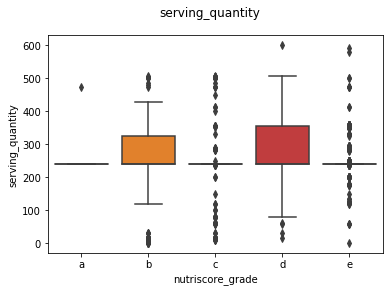

                        sum_sq      df          F        PR(>F)
nutriscore_grade  3.518486e+05     4.0  10.536601  2.083681e-08
Residual          1.129518e+07  1353.0        NaN           NaN


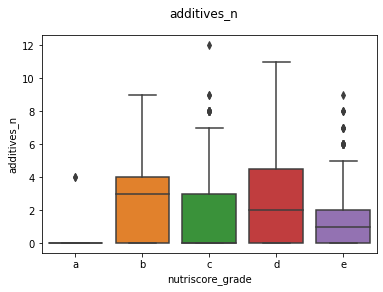

                       sum_sq      df          F        PR(>F)
nutriscore_grade   370.336182     4.0  20.979024  8.341924e-17
Residual          6054.872242  1372.0        NaN           NaN


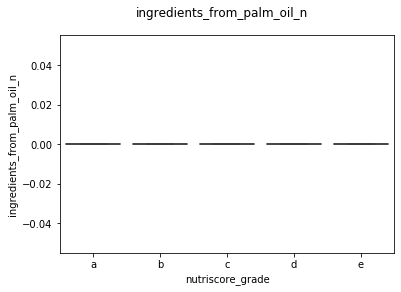

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                  sum_sq      df   F  PR(>F)
nutriscore_grade     NaN     4.0 NaN     NaN
Residual             0.0  1372.0 NaN     NaN


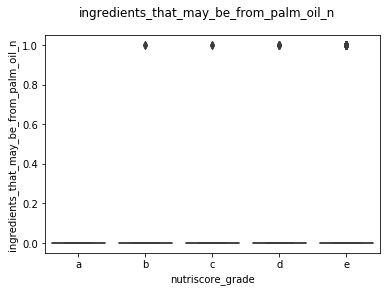

                     sum_sq      df         F    PR(>F)
nutriscore_grade   0.474042     4.0  4.238251  0.002057
Residual          38.364012  1372.0       NaN       NaN


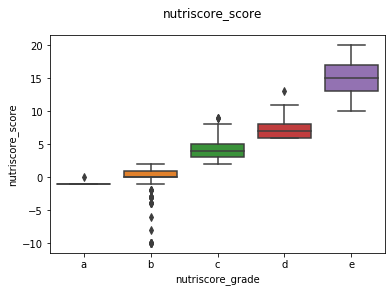

                        sum_sq      df            F  PR(>F)
nutriscore_grade  59539.311107     4.0  3244.068309     0.0
Residual           6396.119915  1394.0          NaN     NaN


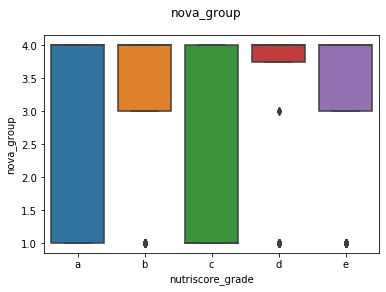

                       sum_sq      df          F        PR(>F)
nutriscore_grade   186.171901     4.0  28.620166  8.386352e-23
Residual          2071.817153  1274.0        NaN           NaN


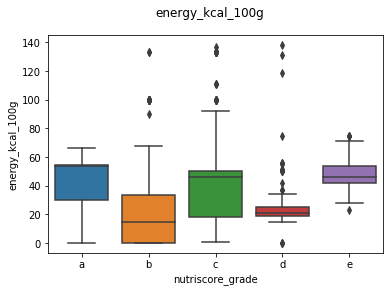

                         sum_sq      df           F        PR(>F)
nutriscore_grade  178347.312848     4.0  103.159798  7.204247e-77
Residual          593426.086018  1373.0         NaN           NaN


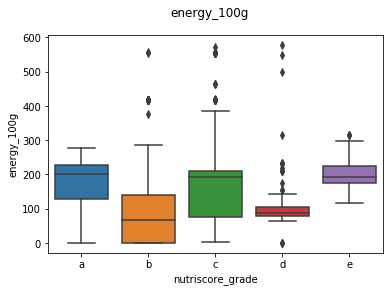

                        sum_sq      df           F        PR(>F)
nutriscore_grade  3.132801e+06     4.0  104.215599  1.030464e-77
Residual          1.047618e+07  1394.0         NaN           NaN


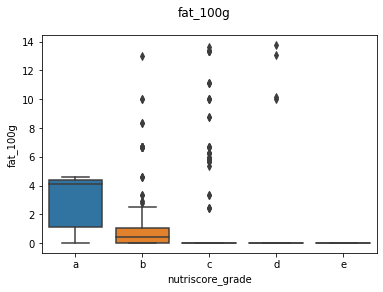

                       sum_sq      df          F        PR(>F)
nutriscore_grade   469.993975     4.0  38.097327  2.748330e-30
Residual          4299.327901  1394.0        NaN           NaN


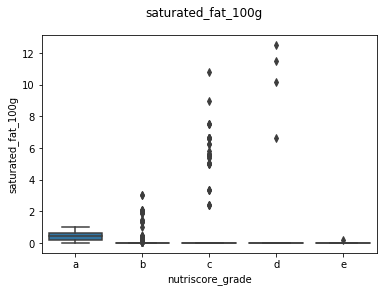

                       sum_sq      df          F        PR(>F)
nutriscore_grade   140.682314     4.0  30.663471  1.708704e-24
Residual          1597.751783  1393.0        NaN           NaN


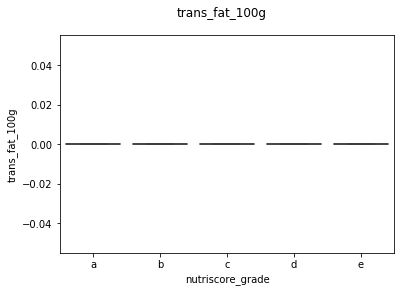

                  sum_sq      df   F  PR(>F)
nutriscore_grade     NaN     4.0 NaN     NaN
Residual             0.0  1144.0 NaN     NaN


C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


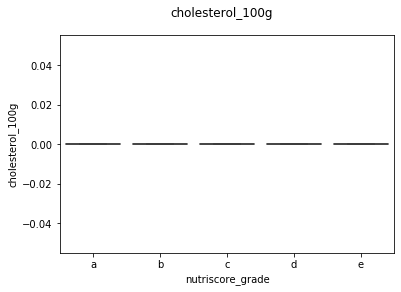

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


                  sum_sq      df   F  PR(>F)
nutriscore_grade     NaN     4.0 NaN     NaN
Residual             0.0  1140.0 NaN     NaN


C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


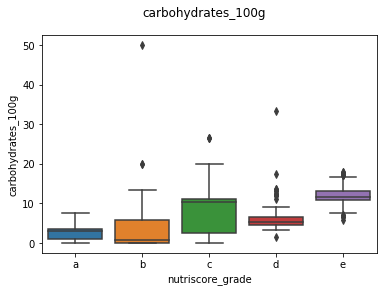

                        sum_sq      df           F         PR(>F)
nutriscore_grade  18984.649508     4.0  370.590393  1.966980e-217
Residual          17853.000171  1394.0         NaN            NaN


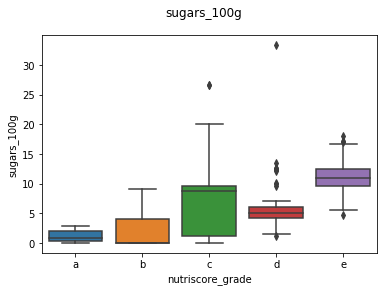

                        sum_sq      df           F         PR(>F)
nutriscore_grade  20653.704733     4.0  532.348674  1.034289e-278
Residual          13511.168563  1393.0         NaN            NaN


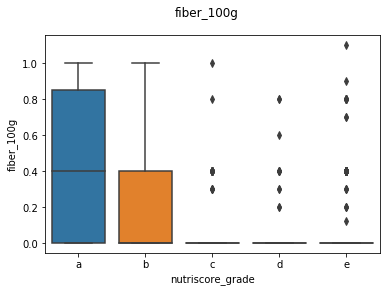

                     sum_sq      df          F        PR(>F)
nutriscore_grade   3.042177     4.0  22.782371  4.024248e-18
Residual          37.689423  1129.0        NaN           NaN


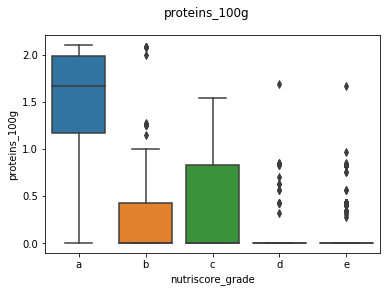

                      sum_sq      df          F        PR(>F)
nutriscore_grade   24.449165     4.0  53.772344  3.456882e-42
Residual          158.455691  1394.0        NaN           NaN


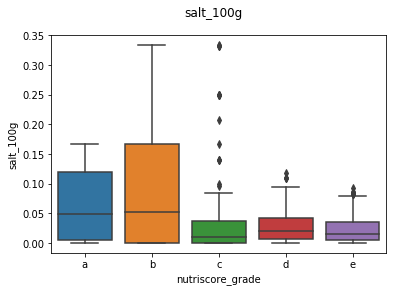

                    sum_sq      df          F        PR(>F)
nutriscore_grade  0.759985     4.0  79.183823  1.370345e-60
Residual          3.344808  1394.0        NaN           NaN


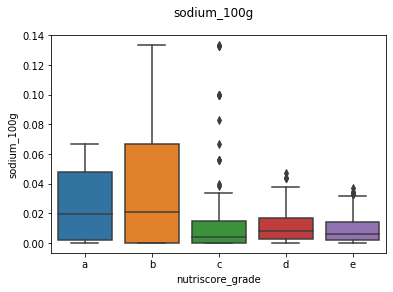

                    sum_sq      df          F        PR(>F)
nutriscore_grade  0.121598     4.0  79.186026  1.365465e-60
Residual          0.535156  1394.0        NaN           NaN


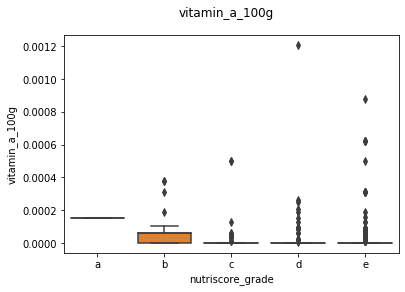

                        sum_sq     df         F    PR(>F)
nutriscore_grade  1.124240e-07    4.0  3.457099  0.008261
Residual          5.812906e-06  715.0       NaN       NaN


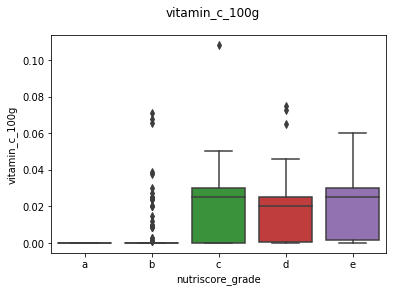

                    sum_sq     df          F        PR(>F)
nutriscore_grade  0.035759    4.0  47.368866  2.038016e-36
Residual          0.183819  974.0        NaN           NaN


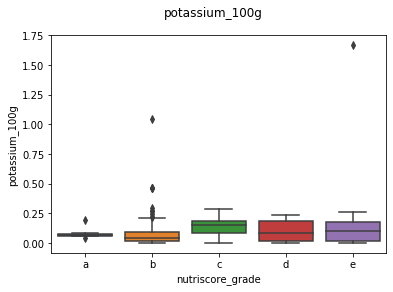

                    sum_sq     df         F   PR(>F)
nutriscore_grade  0.207631    4.0  4.764697  0.00085
Residual          7.462570  685.0       NaN      NaN


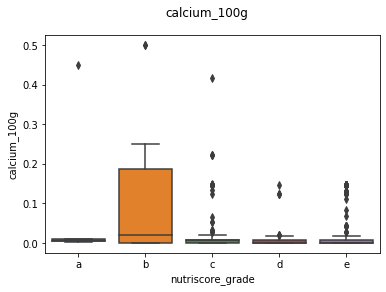

                    sum_sq      df          F        PR(>F)
nutriscore_grade  0.909355     4.0  67.342426  6.238690e-51
Residual          3.659436  1084.0        NaN           NaN


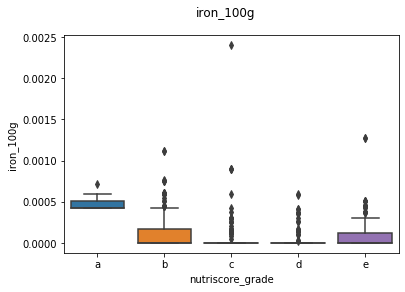

                    sum_sq      df          F        PR(>F)
nutriscore_grade  0.000002     4.0  18.881196  5.419029e-15
Residual          0.000030  1026.0        NaN           NaN


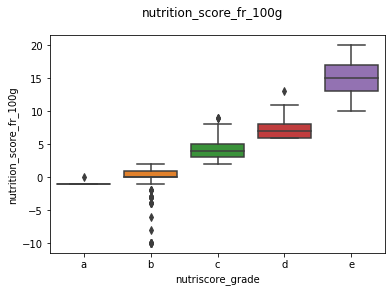

                        sum_sq      df            F  PR(>F)
nutriscore_grade  59539.311107     4.0  3244.068309     0.0
Residual           6396.119915  1394.0          NaN     NaN


In [35]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1[data1['isdrink'] == True], x = 'nutriscore_grade', order = ['a', 'b', 'c', 'd', 'e'])
    plt.suptitle(c)
    plt.show()
    print(sm.stats.anova_lm(smf.ols(c + '~' +'nutriscore_grade', data = data1[data1['isdrink'] == True]).fit(), typ=2))

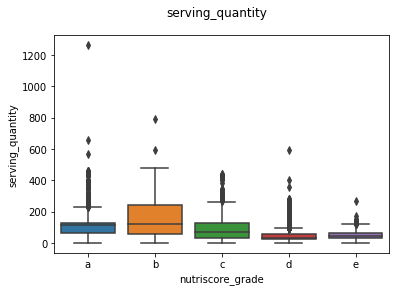

                        sum_sq       df            F  PR(>F)
nutriscore_grade  2.814760e+07      4.0  2044.568954     0.0
Residual          8.559981e+07  24871.0          NaN     NaN


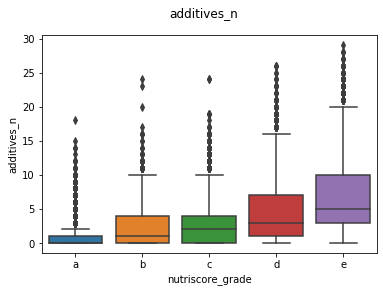

                         sum_sq       df            F  PR(>F)
nutriscore_grade  100799.786353      4.0  1972.753916     0.0
Residual          318838.888993  24960.0          NaN     NaN


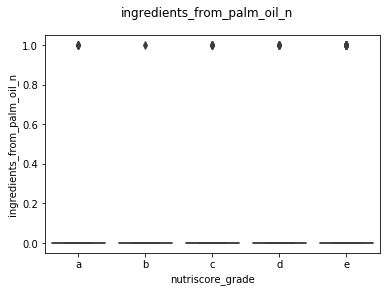

                     sum_sq       df        F        PR(>F)
nutriscore_grade   0.085818      4.0  14.9323  3.419158e-12
Residual          35.862269  24960.0      NaN           NaN


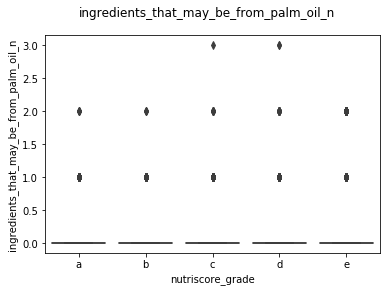

                       sum_sq       df           F         PR(>F)
nutriscore_grade    38.081904      4.0  183.665015  2.122990e-155
Residual          1293.828771  24960.0         NaN            NaN


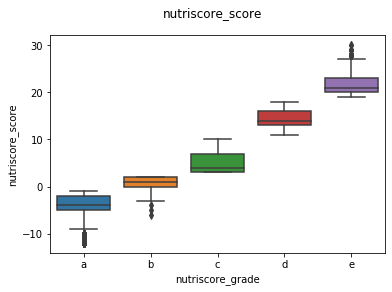

                        sum_sq       df              F  PR(>F)
nutriscore_grade  2.025245e+06      4.0  125453.514409     0.0
Residual          1.032329e+05  25579.0            NaN     NaN


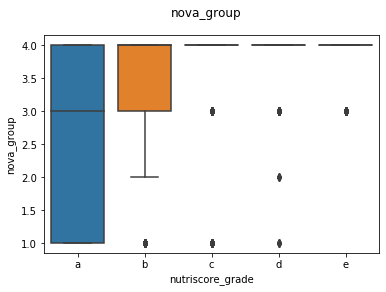

                        sum_sq       df            F  PR(>F)
nutriscore_grade   9359.848589      4.0  3110.399149     0.0
Residual          18249.362556  24258.0          NaN     NaN


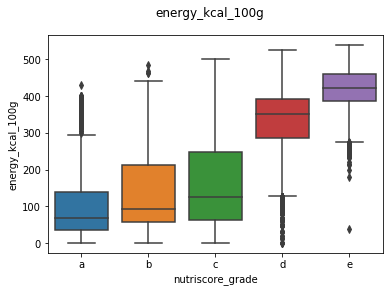

                        sum_sq       df            F  PR(>F)
nutriscore_grade  3.044035e+08      4.0  7117.617896     0.0
Residual          2.724510e+08  25482.0          NaN     NaN


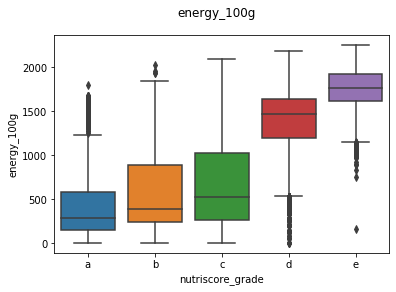

                        sum_sq       df            F  PR(>F)
nutriscore_grade  5.356040e+09      4.0  7152.956917     0.0
Residual          4.788118e+09  25578.0          NaN     NaN


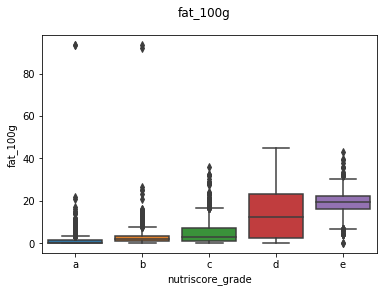

                        sum_sq       df            F  PR(>F)
nutriscore_grade  1.144838e+06      4.0  5760.213273     0.0
Residual          1.270902e+06  25578.0          NaN     NaN


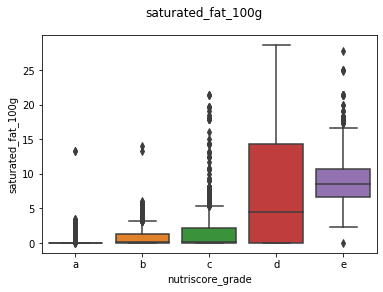

                         sum_sq       df           F  PR(>F)
nutriscore_grade  320312.802716      4.0  4361.21682     0.0
Residual          469648.793338  25578.0         NaN     NaN


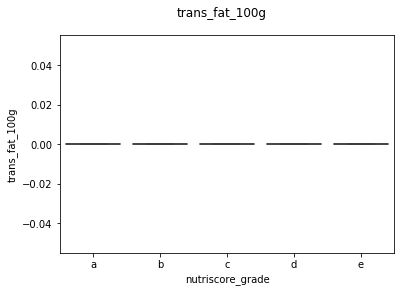

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\vince\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                  sum_sq       df   F  PR(>F)
nutriscore_grade     NaN      4.0 NaN     NaN
Residual             0.0  23969.0 NaN     NaN


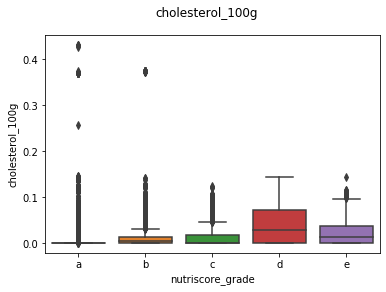

                     sum_sq       df            F  PR(>F)
nutriscore_grade   4.777809      4.0  1177.384205     0.0
Residual          24.567050  24216.0          NaN     NaN


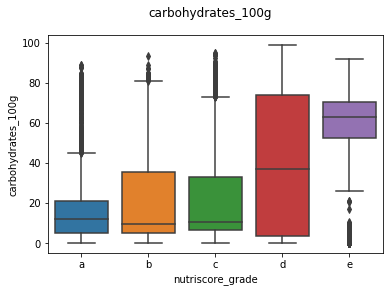

                        sum_sq       df            F  PR(>F)
nutriscore_grade  3.267092e+06      4.0  1026.632686     0.0
Residual          2.034866e+07  25577.0          NaN     NaN


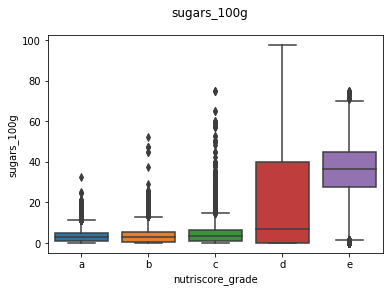

                        sum_sq       df            F  PR(>F)
nutriscore_grade  2.875435e+06      4.0  3116.996417     0.0
Residual          5.898937e+06  25578.0          NaN     NaN


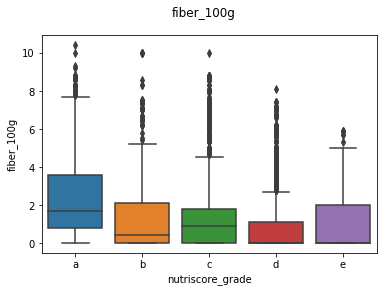

                        sum_sq       df           F  PR(>F)
nutriscore_grade   8606.996171      4.0  929.553229     0.0
Residual          56363.568853  24349.0         NaN     NaN


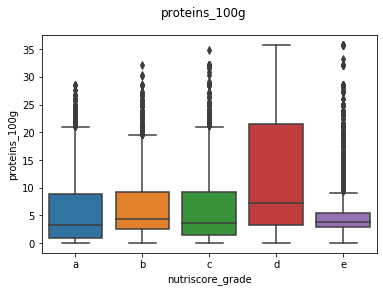

                        sum_sq       df           F  PR(>F)
nutriscore_grade  1.479879e+05      4.0  748.067792     0.0
Residual          1.265004e+06  25578.0         NaN     NaN


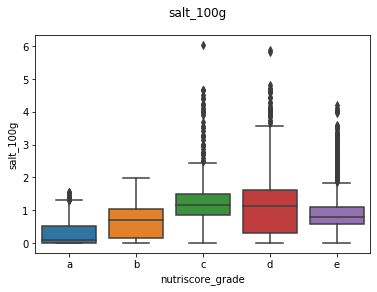

                       sum_sq       df           F  PR(>F)
nutriscore_grade  3480.931526      4.0  2380.62038     0.0
Residual          9350.006760  25578.0         NaN     NaN


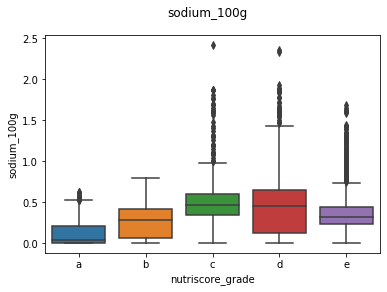

                       sum_sq       df            F  PR(>F)
nutriscore_grade   556.945551      4.0  2380.629148     0.0
Residual          1495.986188  25578.0          NaN     NaN


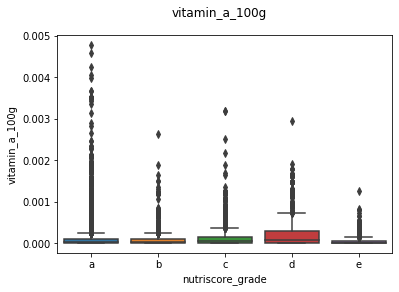

                    sum_sq       df          F        PR(>F)
nutriscore_grade  0.000026      4.0  90.114391  5.019555e-76
Residual          0.001395  19277.0        NaN           NaN


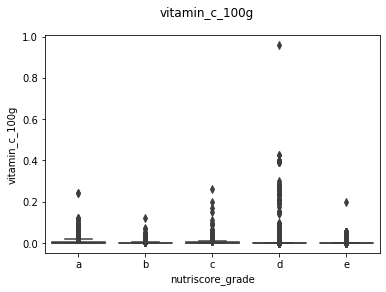

                     sum_sq       df          F        PR(>F)
nutriscore_grade   0.332594      4.0  80.732796  4.532129e-68
Residual          20.014481  19433.0        NaN           NaN


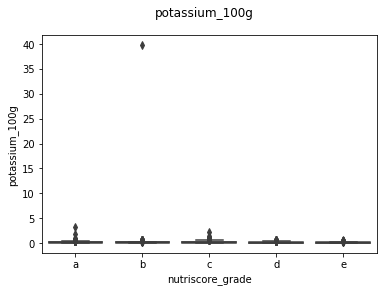

                       sum_sq      df          F        PR(>F)
nutriscore_grade    10.737630     4.0  14.792958  4.728293e-12
Residual          1681.275431  9265.0        NaN           NaN


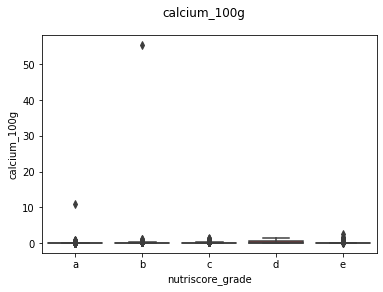

                       sum_sq       df           F         PR(>F)
nutriscore_grade   168.963305      4.0  251.388507  6.863047e-212
Residual          3981.976384  23698.0         NaN            NaN


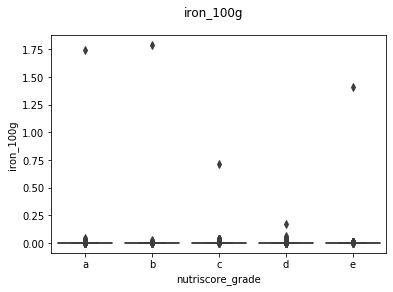

                    sum_sq       df        F    PR(>F)
nutriscore_grade  0.002421      4.0  1.62492  0.164849
Residual          8.917341  23939.0      NaN       NaN


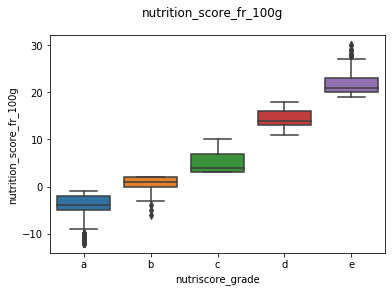

                        sum_sq       df              F  PR(>F)
nutriscore_grade  2.025245e+06      4.0  125453.514409     0.0
Residual          1.032329e+05  25579.0            NaN     NaN


In [36]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1[data1['isdrink'] == False], x = 'nutriscore_grade', order = ['a', 'b', 'c', 'd', 'e'])
    plt.suptitle(c)
    plt.show()
    print(sm.stats.anova_lm(smf.ols(c + '~' +'nutriscore_grade', data = data1[data1['isdrink'] == False]).fit(), typ=2))

### (Première) analyse multivariée

A ce moment, il me reste encore une grosse vingtaine de variables, plus ou moins pertinentes.  
Je vais devoir choisir entre elles celles à prendre en compte dans l'analyse.  
Pour fixer les idées, je sors la matrice de corrélation de TOUTES les variables.

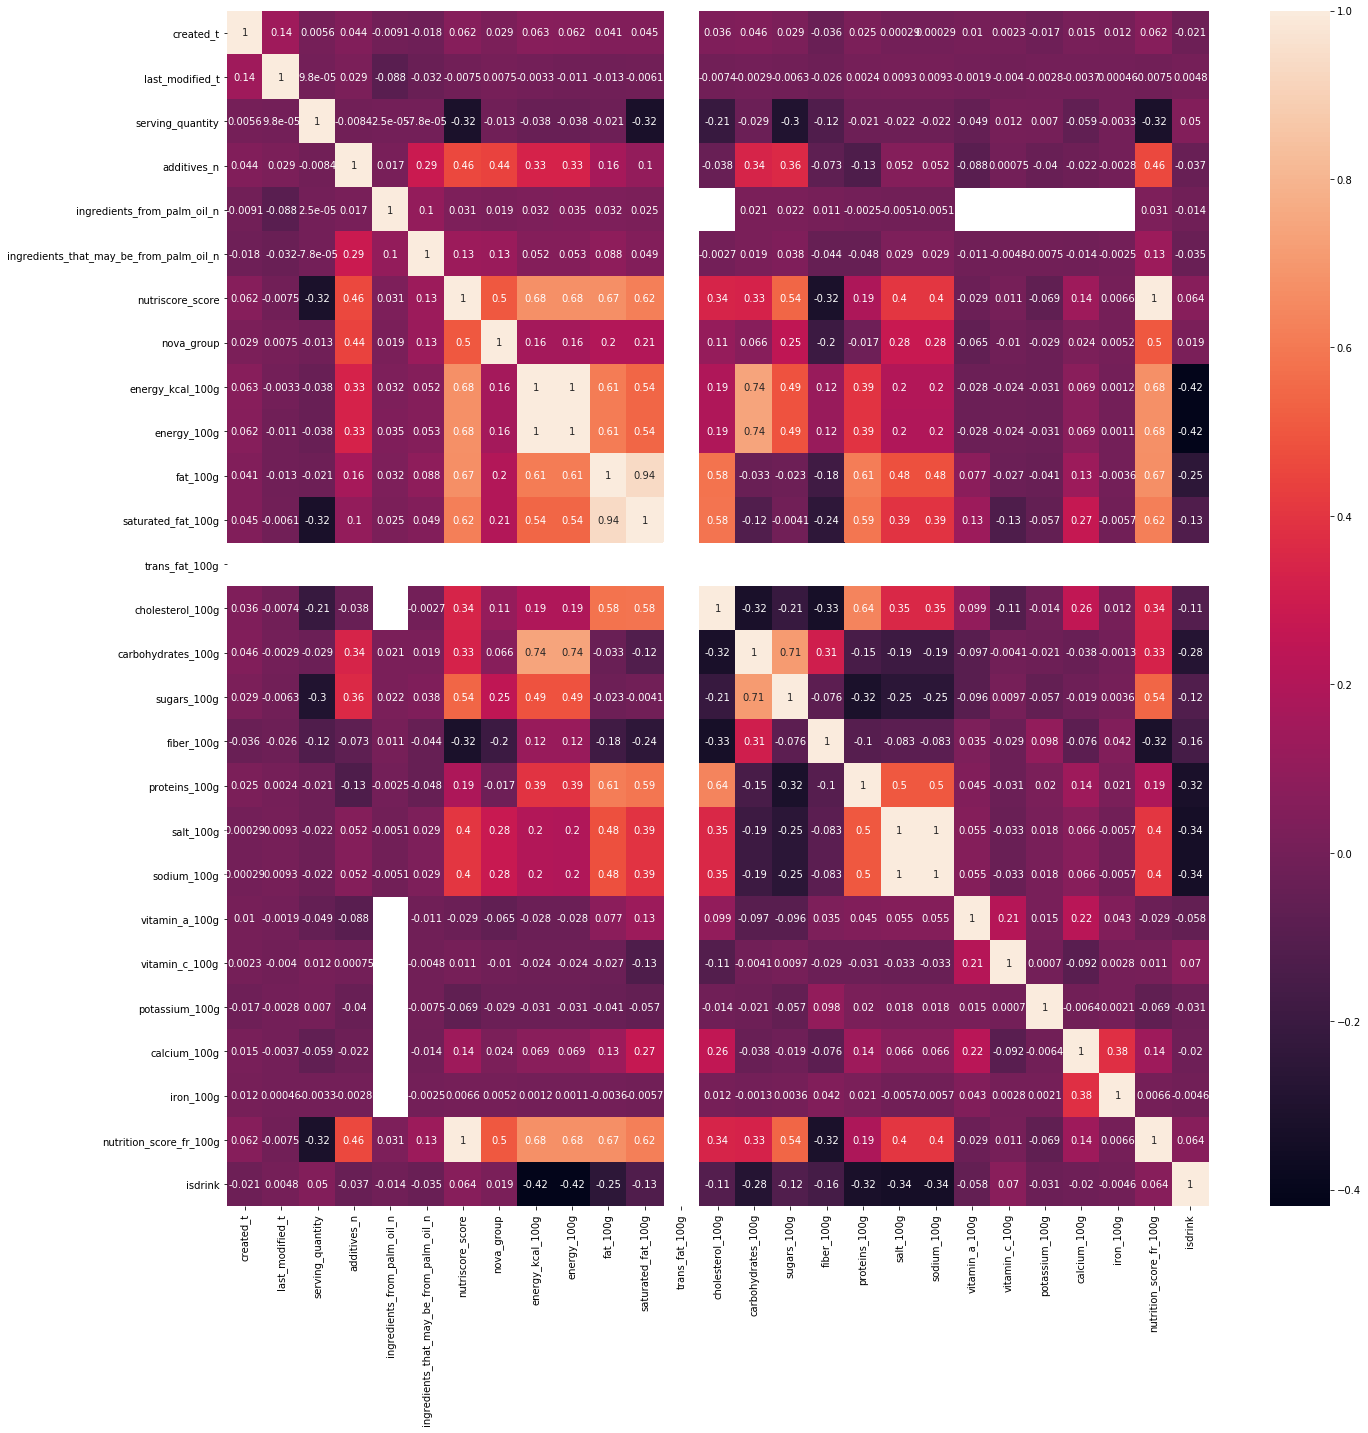

In [37]:
plt.subplots(figsize=(22,22))
data1_mat_corr = data1.corr()
sns.heatmap(data1_mat_corr, annot = True)
plt.show()

J'ai décidé de centrer mon analyse sur le nutriscore.  
Après ces premiers examens, je peux désigner une liste de variables qui ont, ou qui pourraient avoir une influence sur le nutriscore. Ce sont ces variables que j'utiliserai pour la suite du projet.
 - 'additives_n'
 - 'nutriscore_score'
 - 'energy_100g'
 - 'fat_100g'
 - 'saturated_fat_100g'
 - 'carbohydrates_100g'
 - 'sugars_100g'
 - 'fiber_100g'
 - 'proteins_100g'
 - 'vitamin_a_100g'
 - 'vitamin_c_100g'
 - 'calcium_100g'

In [38]:
variables_analyse = ['additives_n', 'nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g',]

### Gestion des valeurs manquantes

J'ai utilisé, plus tôt, l'iterative imputing pour compléter les valeurs manquantes. J'aurais pu utiliser d'autres méthodes.
Je teste ci-dessous la méthode knn sur le jeu de données, pour prédire le nutriscore dans les cas où il manque.

Mise en place du modèle et des jeux de données (entraînement, test).

In [39]:
data_knn = data1.dropna(subset=['nutriscore_score', 'energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'])

from sklearn.model_selection import train_test_split

sample = np.random.randint(data_knn.shape[0], size=min(data_knn.shape[0], 5000))
data_knn = data_knn.iloc[sample]

xtrain, xtest, ytrain, ytest = train_test_split(data_knn[['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']], data_knn[['nutriscore_score']], train_size=0.8)

J'entraîne le modèle:

In [40]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(xtrain, ytrain.values.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Je calcule l'erreur du modéle quand appliqué sur l'échantillon test.

In [41]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.138483


Test: je regarde les erreurs obtenues en exécutant la méthode knn avec différentes valeurs de k.

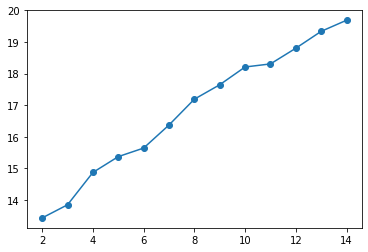

In [42]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsRegressor(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain.values.ravel()).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

J'utilise l'algorithme knn pour compléter les valeurs nutriscore, autant que possible.

In [43]:
knn = neighbors.KNeighborsRegressor(n_neighbors=4)
knn.fit(xtrain, ytrain.values.ravel())
def prediction_knn (row):
    if pd.isnull(row['nutriscore_score']):
        if row[['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].isnull().any():
            output = row['nutriscore_score']
        else: 
            output = knn.predict(row[['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].values.reshape(1,6))[0]
            print('Une valeur complétée')
    else:
        output = row['nutriscore_score']
    return output

In [44]:
data1_recalculated = data1[['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutriscore_score']].copy()
data1_recalculated['nutriscore_score'] = data1_recalculated.apply(lambda x: prediction_knn(x), axis = 1)

Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur co

Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur complétée
Une valeur co

Nouvelle matrice de corrélation, calculée sur les données calculées par KNN:

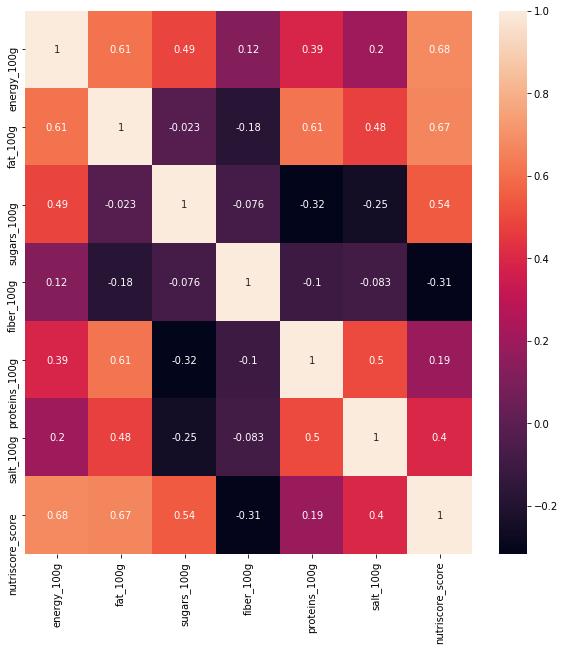

In [45]:
plt.subplots(figsize=(10,10))
data1_recalculated_corr = data1_recalculated.corr()
sns.heatmap(data1_recalculated_corr, annot = True)
plt.show()

Je rajoute le nutriscore_grade, en partant du nutriscore_score et de l'indicateur isdrink.

In [46]:
def score_to_grade (row):
    output = float("NAN")
    if type(row['nutriscore_grade']) == str:
        output = row['nutriscore_grade']
    else: 
        if row['isdrink'] == True:
            if row['nutriscore_score'] <= 1:
                output = 'b'
            if 1 < row['nutriscore_score'] <= 5:
                output = 'c'
            if 5 < row['nutriscore_score'] <= 9:
                output = 'd'
            if 9 < row['nutriscore_score']:
                output = 'e'
            if row['pnns_groups_2'] == 'Waters and flavored waters':
                output = 'a'
        if row['isdrink'] == False:
            if row['nutriscore_score'] <= -1:
                output = 'a'
            if -1 < row['nutriscore_score'] <= 2:
                output = 'b'
            if 2 < row['nutriscore_score'] <= 10:
                output = 'c'
            if 10 < row['nutriscore_score'] <= 18:
                output = 'd'
            if 18 < row['nutriscore_score']:
                output = 'e'
    return output

recalc_score_grade = data1[['nutriscore_grade', 'isdrink', 'pnns_groups_2']].copy()
recalc_score_grade['nutriscore_score'] = data1_recalculated['nutriscore_score'].copy()
recalc_score_grade['nutriscore_grade'] = recalc_score_grade.apply(lambda x: score_to_grade(x), axis = 1)

In [47]:
X = data1_recalculated.fillna(0).values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [48]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

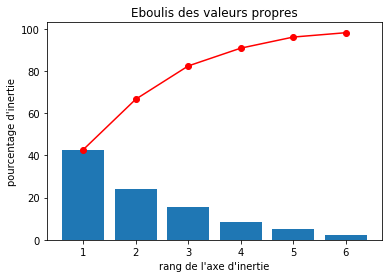

In [50]:
# Eboulis des valeurs propres
display_scree_plot(pca)

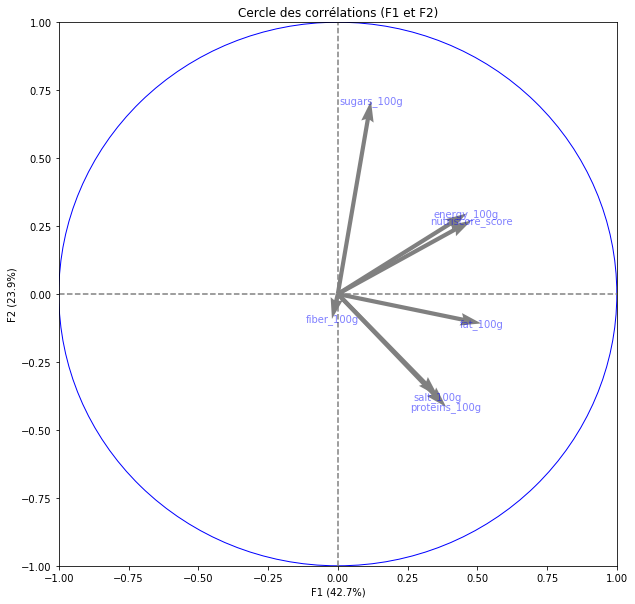

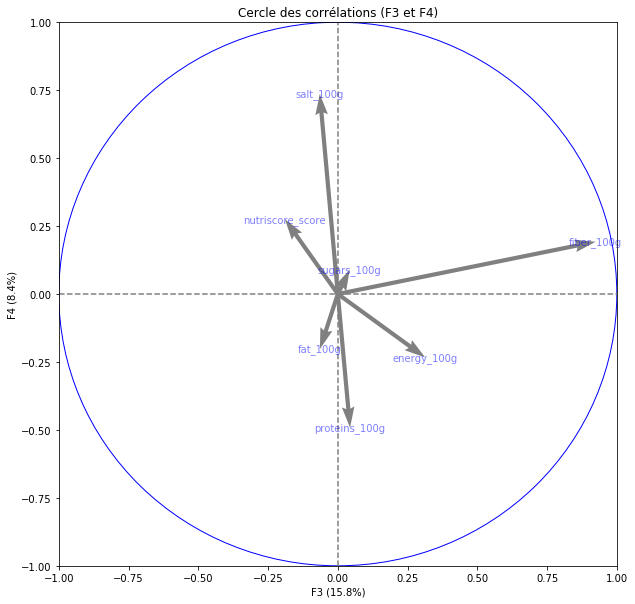

In [51]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, 6, pca, [(0,1),(2,3)], labels = np.array(data1_recalculated.columns))

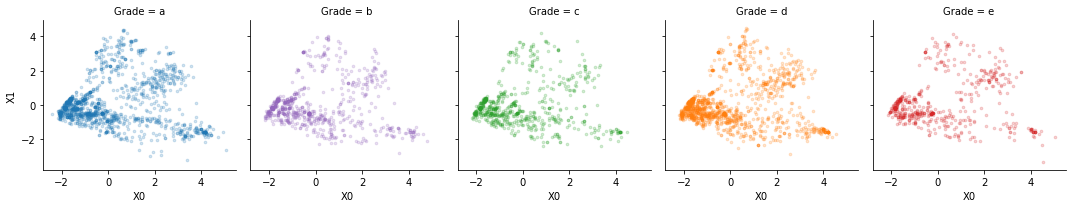

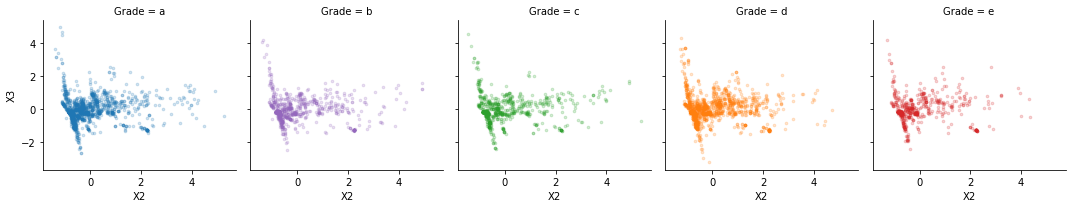

In [52]:
# Projection des individus
X_projected = pca.transform(X_scaled)

X_projected_with_grade = pd. DataFrame(X_projected, columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5'])
X_projected_with_grade['Grade'] = recalc_score_grade['nutriscore_grade'].copy()
X_projected_with_grade = X_projected_with_grade.sample(20000)


# Projection sur le 1er plan factoriel
g = sns.FacetGrid(X_projected_with_grade, col='Grade', hue='Grade', margin_titles=True, col_order=['a', 'b', 'c', 'd', 'e'])
g = (g.map(plt.scatter, 'X0', 'X1', alpha=.2, s=7))

# Projection sur le 2e plan factoriel
g = sns.FacetGrid(X_projected_with_grade, col='Grade', hue='Grade', col_order=['a', 'b', 'c', 'd', 'e'])
g = (g.map(plt.scatter, 'X2', 'X3', alpha=.2, s=7))